In [1]:
#!pip install scikit-learn

In [2]:
#!pip install xgboost


In [3]:
#!pip install lightgbm

In [4]:
#!pip install --upgrade pandas

In [1]:
#!pip install --upgrade numpy

In [8]:
#!pip install --upgrade matplotlib

In [10]:
#!pip install --upgrade scipy

In [11]:
#!pip install --upgrade scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
import numpy as np
np.__version__

'1.24.3'

In [3]:
df = pd.read_csv('data/Personas09.CSV')

In [4]:
df.columns

Index(['ENT', 'MUN', 'LOC50K', 'ID_VIV', 'ID_PERSONA', 'COBERTURA', 'ESTRATO',
       'UPM', 'FACTOR', 'CLAVIVP', 'NUMPER', 'SEXO', 'EDAD', 'PARENTESCO',
       'IDENT_MADRE', 'IDENT_PADRE', 'ENT_PAIS_NAC', 'NACIONALIDAD',
       'SERSALUD', 'AFRODES', 'REGIS_NAC', 'DHSERSAL1', 'DHSERSAL2',
       'RELIGION', 'DIS_VER', 'DIS_OIR', 'DIS_CAMINAR', 'DIS_RECORDAR',
       'DIS_BANARSE', 'DIS_HABLAR', 'DIS_MENTAL', 'CAU_VER', 'CAU_OIR',
       'CAU_CAMINAR', 'CAU_RECORDAR', 'CAU_BANARSE', 'CAU_HABLAR',
       'CAU_MENTAL', 'HLENGUA', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA',
       'PERTE_INDIGENA', 'ASISTEN', 'MUN_ASI', 'ENT_PAIS_ASI',
       'TIE_TRASLADO_ESCU', 'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2',
       'MED_TRASLADO_ESC3', 'NIVACAD', 'ESCOLARI', 'NOMCAR_C', 'ALFABET',
       'ESCOACUM', 'ENT_PAIS_RES_5A', 'MUN_RES_5A', 'CAUSA_MIG_V',
       'SITUA_CONYUGAL', 'IDENT_PAREJA', 'CONACT', 'OCUPACION_C', 'SITTRA',
       'AGUINALDO', 'VACACIONES', 'SERVICIO_MEDICO', 'UTILIDADES',
       

In [75]:
features=[ 'MUN', 'NUMPER', 'SEXO', 'EDAD','ENT_PAIS_NAC', 'NACIONALIDAD',
       'SERSALUD', 'AFRODES', 'REGIS_NAC', 'RELIGION', 'DIS_VER', 'DIS_OIR', 'DIS_CAMINAR', 'DIS_RECORDAR',
       'DIS_BANARSE', 'DIS_HABLAR', 'DIS_MENTAL', 'HLENGUA', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA',
       'PERTE_INDIGENA', 'ALFABET', 'MIGRANTE', 'CAUSA_MIG_V',
       'SITUA_CONYUGAL', 'CONACT', 'OCUPACION', 'SITTRA',
       'AGUINALDO', 'VACACIONES', 'SERVICIO_MEDICO', 'UTILIDADES',
       'INCAP_SUELDO', 'SAR_AFORE', 'CREDITO_VIVIENDA', 'INGTRMEN', 'HORTRA',
       'ACTIVIDADES_C','TIE_TRASLADO_TRAB','MED_TRASLADO_TRAB1',
       'HIJOS_NAC_VIVOS', 'HIJOS_FALLECIDOS', 'HIJOS_SOBREVIV', 'SOBREVIVENCIA', 'IDENT_HIJO',  'TAMLOC']

In [51]:
def status(row):
    if row["ENT_PAIS_RES_5A"] == 9 :
        return 1
    elif row["ENT_PAIS_RES_5A"] == 999 :
        return 999

    elif row["ENT_PAIS_RES_5A"] == np.NaN:
        return np.NaN
    else :
        return 3
    
df['MIGRANTE'] = df.apply(lambda ren : status(ren), axis=1)

In [73]:
def ocupacion(row):
    if row["OCUPACION_C"]==999:
        return 999
    elif pd.isnull(row["OCUPACION_C"]):
        return np.NaN
    else :
         return int(str(row["OCUPACION_C"])[0])
       
df['OCUPACION'] = df.apply(lambda ren : ocupacion(ren), axis=1)

In [74]:
df["OCUPACION"].value_counts()

OCUPACION
2.0      37422
9.0      21434
4.0      18632
3.0      11959
5.0      11863
8.0       9777
7.0       9747
1.0       6923
999.0     3969
6.0        999
Name: count, dtype: int64

In [6]:
def target(row):
    if row.NIVACAD == 0:
        return 0 
    elif 0<row.NIVACAD <= 2: 
        return 1 
    elif 2<row.NIVACAD <= 3: 
        return 2 
    elif 3<row.NIVACAD <= 9: 
        return 3
    elif 9<row.NIVACAD <= 11: 
        return 4
    else: 
        return 5

In [76]:
df['target']= df.apply(lambda row: target(row),axis=1)

In [77]:
df.target.value_counts(normalize=True)

target
3    0.250149
1    0.225516
2    0.213364
4    0.209951
5    0.067748
0    0.033271
Name: proportion, dtype: float64

# Regresión logistica

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [79]:
# Crear los conjuntos de datos X e y
X = df[features]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.impute import SimpleImputer

# Crear el imputador
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformarlos
X_train = imputer.fit_transform(X_train)

# Transformar los datos de prueba con el imputador ajustado a los datos de entrenamiento
X_test = imputer.transform(X_test)


In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


/Users/emilio/opt/anaconda3/envs/proyecto1_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# Predecir los valores para los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Imprimir la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_mat}")

# Imprimir el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{class_report}")


Accuracy: 0.38540270280062316
Confusion Matrix: 
[[ 154 1353   90   95   45   47]
 [  32 4644 3006 4146  682   63]
 [   2 1440 4237 4561 1534    9]
 [   3  985 3196 6246 3341   13]
 [   2  370 1344 4058 5782   19]
 [  58 1537  102  363 1431  212]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.09      0.15      1784
           1       0.45      0.37      0.41     12573
           2       0.35      0.36      0.36     11783
           3       0.32      0.45      0.38     13784
           4       0.45      0.50      0.47     11575
           5       0.58      0.06      0.10      3703

    accuracy                           0.39     55202
   macro avg       0.46      0.30      0.31     55202
weighted avg       0.41      0.39      0.37     55202



In [85]:
y_score= model.predict_proba(X_test)

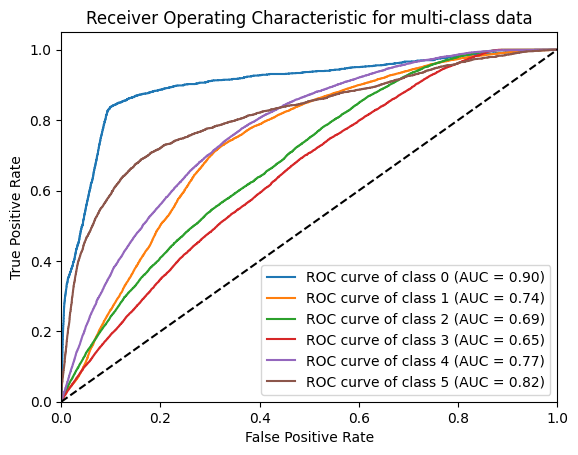

In [86]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Asumiendo que y_test es tu vector de etiquetas verdaderas y y_score son tus probabilidades predichas
# Necesitamos binarizar las etiquetas para el cálculo multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


# Árboles de decisión y Random Forest

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [88]:
# Crear los conjuntos de datos X e y
X = df[features]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [90]:
# Crear el modelo
tree_model = DecisionTreeClassifier()

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree: {accuracy_tree}")

# Imprimir la matriz de confusión
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)
print(f"Confusion Matrix of Decision Tree: \n{conf_mat_tree}")

# Imprimir el reporte de clasificación
class_report_tree = classification_report(y_test, y_pred_tree)
print(f"Classification Report of Decision Tree: \n{class_report_tree}")


Accuracy of Decision Tree: 0.5064671569870657
Confusion Matrix of Decision Tree: 
[[ 926  635   78   68   50   27]
 [ 705 8054 2066 1178  508   62]
 [  93 1908 5097 3446 1119  120]
 [  70 1077 3474 5894 2934  335]
 [  41  483 1194 3021 5778 1058]
 [  20   50   96  308 1020 2209]]
Classification Report of Decision Tree: 
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1784
           1       0.66      0.64      0.65     12573
           2       0.42      0.43      0.43     11783
           3       0.42      0.43      0.43     13784
           4       0.51      0.50      0.50     11575
           5       0.58      0.60      0.59      3703

    accuracy                           0.51     55202
   macro avg       0.52      0.52      0.52     55202
weighted avg       0.51      0.51      0.51     55202



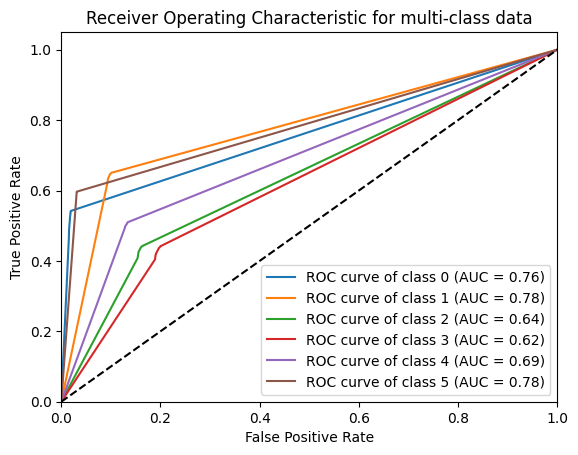

In [91]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

y_score= tree_model.predict_proba(X_test)

# Asumiendo que y_test es tu vector de etiquetas verdaderas y y_score son tus probabilidades predichas
# Necesitamos binarizar las etiquetas para el cálculo multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [92]:
# Crear el modelo
forest_model = RandomForestClassifier()

# Entrenar el modelo
forest_model.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_forest = forest_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy of Random Forest: {accuracy_forest}")

# Imprimir la matriz de confusión
conf_mat_forest = confusion_matrix(y_test, y_pred_forest)
print(f"Confusion Matrix of Random Forest: \n{conf_mat_forest}")

# Imprimir el reporte de clasificación
class_report_forest = classification_report(y_test, y_pred_forest)
print(f"Classification Report of Random Forest: \n{class_report_forest}")


Accuracy of Random Forest: 0.5913010398173979
Confusion Matrix of Random Forest: 
[[1053  589   70   32   32    8]
 [ 392 8928 2116  885  245    7]
 [   2 1468 6111 3515  685    2]
 [   4  846 3123 7080 2705   26]
 [   6  404  741 2737 7558  129]
 [  25   42   43  161 1521 1911]]
Classification Report of Random Forest: 
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      1784
           1       0.73      0.71      0.72     12573
           2       0.50      0.52      0.51     11783
           3       0.49      0.51      0.50     13784
           4       0.59      0.65      0.62     11575
           5       0.92      0.52      0.66      3703

    accuracy                           0.59     55202
   macro avg       0.66      0.58      0.61     55202
weighted avg       0.60      0.59      0.59     55202



In [93]:
y_score= forest_model.predict_proba(X_test)

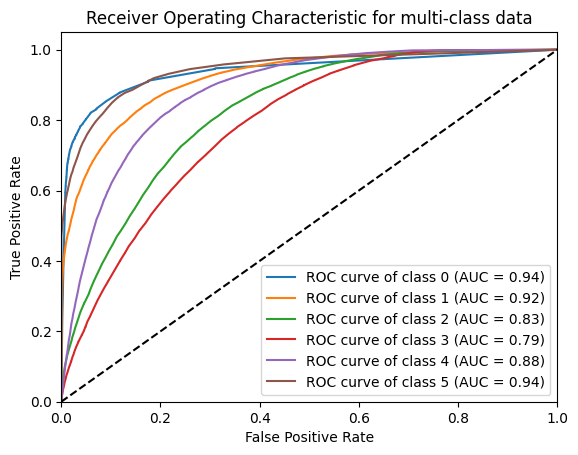

In [94]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Asumiendo que y_test es tu vector de etiquetas verdaderas y y_score son tus probabilidades predichas
# Necesitamos binarizar las etiquetas para el cálculo multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Máquinas de vectores de soporte (SVM)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
# Crear los conjuntos de datos X e y
X = df[features]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Crear el modelo
svm_model = SVC(probability=True)  # establecer probability=True si quieres poder llamar a predict_proba()

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm}")

# Imprimir la matriz de confusión
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix of SVM: \n{conf_mat_svm}")

# Imprimir el reporte de clasificación
class_report_svm = classification_report(y_test, y_pred_svm)
print(f"Classification Report of SVM: \n{class_report_svm}")


# Gradient Boosting con XGBoost

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [96]:
# Crear los conjuntos de datos X e y
X = df[features]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
# Crear el modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') 
# Ajusta los parámetros según tus necesidades

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost: {accuracy_xgb}")

# Imprimir la matriz de confusión
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Confusion Matrix of XGBoost: \n{conf_mat_xgb}")

# Imprimir el reporte de clasificación
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Classification Report of XGBoost: \n{class_report_xgb}")


/Users/emilio/opt/anaconda3/envs/proyecto1_ds/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy of XGBoost: 0.6174051664794754
Confusion Matrix of XGBoost: 
[[1057  601   53   36   29    8]
 [ 319 9232 2010  758  250    4]
 [   2 1384 6236 3501  658    2]
 [   2  801 2718 7475 2769   19]
 [   0  324  464 2560 7990  237]
 [  15   33   31  135 1397 2092]]
Classification Report of XGBoost: 
              precision    recall  f1-score   support

           0       0.76      0.59      0.66      1784
           1       0.75      0.73      0.74     12573
           2       0.54      0.53      0.54     11783
           3       0.52      0.54      0.53     13784
           4       0.61      0.69      0.65     11575
           5       0.89      0.56      0.69      3703

    accuracy                           0.62     55202
   macro avg       0.68      0.61      0.63     55202
weighted avg       0.63      0.62      0.62     55202



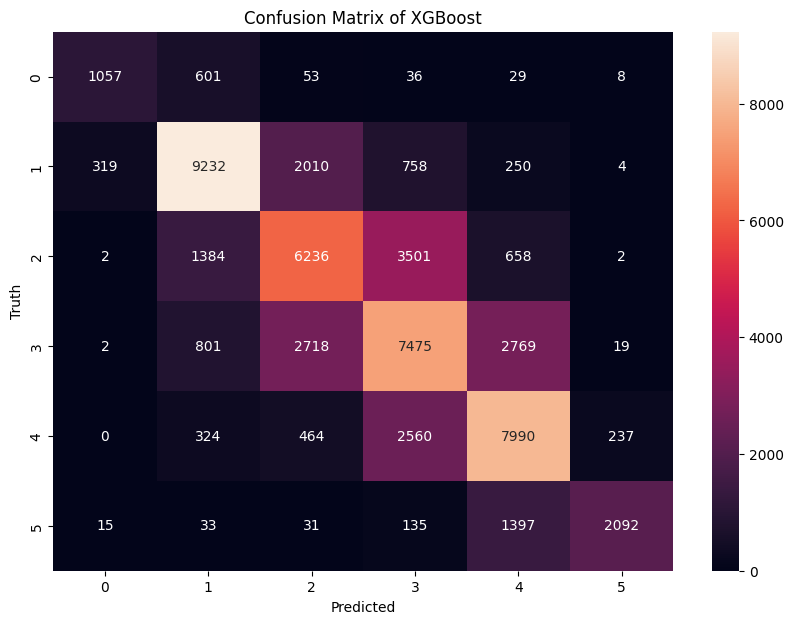

Classification Report of XGBoost: 
              precision    recall  f1-score   support

           0       0.76      0.59      0.66      1784
           1       0.75      0.73      0.74     12573
           2       0.54      0.53      0.54     11783
           3       0.52      0.54      0.53     13784
           4       0.61      0.69      0.65     11575
           5       0.89      0.56      0.69      3703

    accuracy                           0.62     55202
   macro avg       0.68      0.61      0.63     55202
weighted avg       0.63      0.62      0.62     55202



In [98]:
# Crear la matriz de confusión
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

# Crear un heatmap a partir de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# Imprimir el reporte de clasificación
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Classification Report of XGBoost: \n{class_report_xgb}")


In [99]:
y_score= xgb_model.predict_proba(X_test)

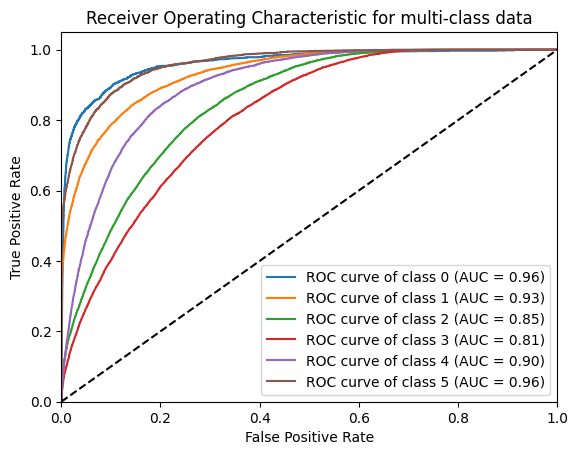

In [100]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Asumiendo que y_test es tu vector de etiquetas verdaderas y y_score son tus probabilidades predichas
# Necesitamos binarizar las etiquetas para el cálculo multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

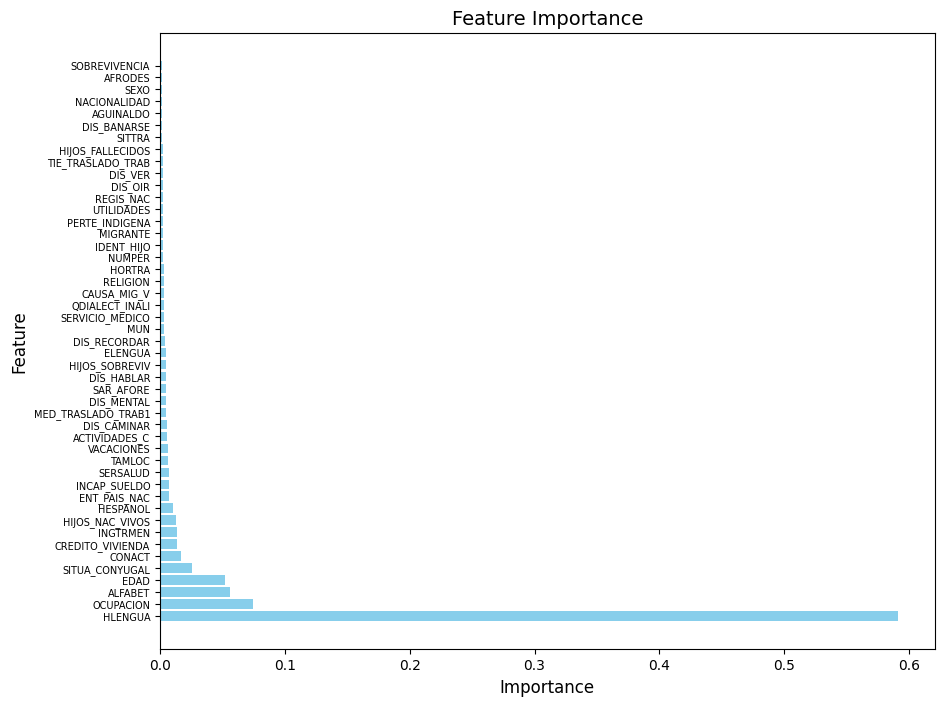

In [101]:
import matplotlib.pyplot as plt
import xgboost

# Obtén la importancia de las características
feature_importance = xgb_model.feature_importances_

# Crea un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Ordena el DataFrame por importancia
importance_df = importance_df.sort_values('Importance', ascending=False)

# Visualiza la importancia de las características
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14)

# Ajusta el tamaño de las etiquetas del eje y
plt.yticks(fontsize=7)

plt.show()


# Hiperparametros

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definir la distribución de los parámetros que queremos probar
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0.0, 0.2)
}

# Crear el modelo base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Crear la búsqueda aleatoria
rand_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                 n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Entrenar el modelo
rand_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f"Best parameters: {rand_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/emilio/opt/anaconda3/envs/proyecto1_ds/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emilio/opt/anaconda3/envs/proyecto1_ds/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters: {'colsample_bytree': 0.6186662652854461, 'gamma': 0.19475110376829186, 'learning_rate': 0.05655426808606085, 'max_depth': 8, 'n_estimators': 274}


In [105]:
# Imprimir los mejores parámetros
print(f"Best parameters: {rand_search.best_params_}")

Best parameters: {'colsample_bytree': 0.6186662652854461, 'gamma': 0.19475110376829186, 'learning_rate': 0.05655426808606085, 'max_depth': 8, 'n_estimators': 274}


In [106]:
# Crear el modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                         colsample_bytree= 0.618, gamma= 0.1947, 
                        learning_rate=0.0565, max_depth= 8, n_estimators=274) 
# Ajusta los parámetros según tus necesidades

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular la precisión del modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost: {accuracy_xgb}")

# Imprimir la matriz de confusión
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Confusion Matrix of XGBoost: \n{conf_mat_xgb}")

# Imprimir el reporte de clasificación
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Classification Report of XGBoost: \n{class_report_xgb}")


/Users/emilio/opt/anaconda3/envs/proyecto1_ds/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy of XGBoost: 0.6183471613347342
Confusion Matrix of XGBoost: 
[[1074  588   58   31   28    5]
 [ 319 9247 1994  754  256    3]
 [   1 1354 6244 3527  656    1]
 [   0  804 2688 7478 2803   11]
 [   0  328  464 2527 8033  223]
 [  16   36   30  133 1430 2058]]
Classification Report of XGBoost: 
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1784
           1       0.75      0.74      0.74     12573
           2       0.54      0.53      0.54     11783
           3       0.52      0.54      0.53     13784
           4       0.61      0.69      0.65     11575
           5       0.89      0.56      0.69      3703

    accuracy                           0.62     55202
   macro avg       0.68      0.61      0.64     55202
weighted avg       0.63      0.62      0.62     55202



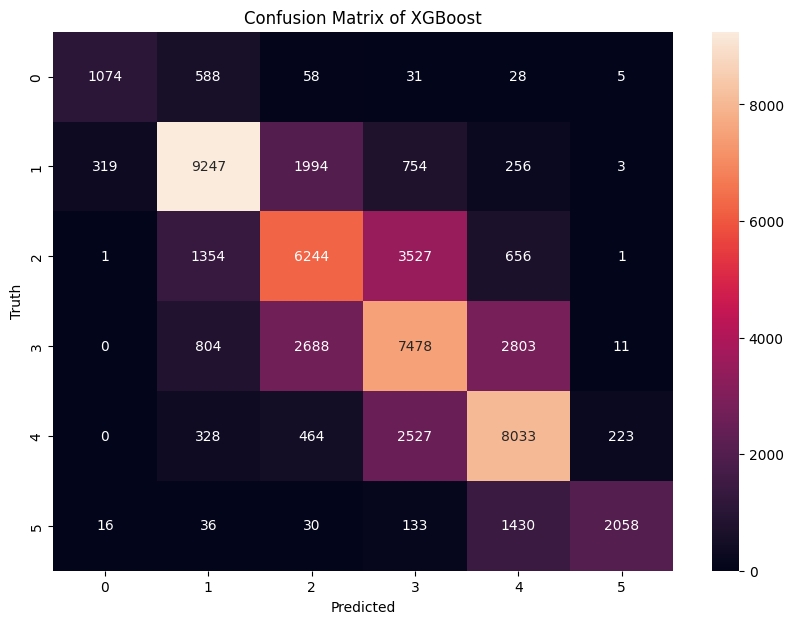

Classification Report of XGBoost: 
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1784
           1       0.75      0.74      0.74     12573
           2       0.54      0.53      0.54     11783
           3       0.52      0.54      0.53     13784
           4       0.61      0.69      0.65     11575
           5       0.89      0.56      0.69      3703

    accuracy                           0.62     55202
   macro avg       0.68      0.61      0.64     55202
weighted avg       0.63      0.62      0.62     55202



In [108]:
# Crear la matriz de confusión
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

# Crear un heatmap a partir de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# Imprimir el reporte de clasificación
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Classification Report of XGBoost: \n{class_report_xgb}")

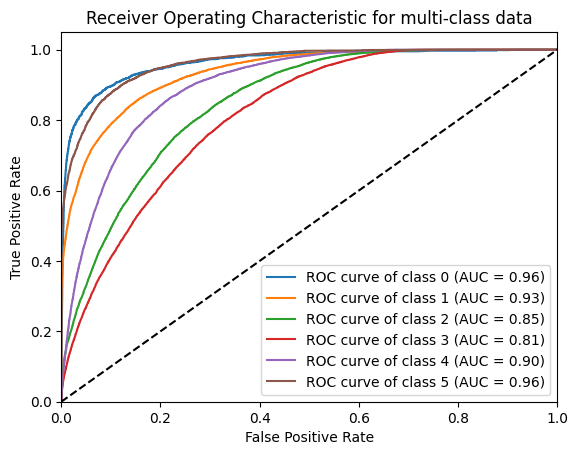

In [107]:
y_score= xgb_model.predict_proba(X_test)
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Asumiendo que y_test es tu vector de etiquetas verdaderas y y_score son tus probabilidades predichas
# Necesitamos binarizar las etiquetas para el cálculo multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [109]:
import pickle

In [110]:
# Guardar el modelo en un archivo .pkl
with open('modelo_6v.pkl', 'wb') as archivo:
    pickle.dump(xgb_model, archivo)